# **Weight Initialization Techniques**
---


### 🧑‍💼 **Shuvendu Pritam Das**  
*Data Science / ML Enthusiast*  

- **GitHub:** [SPritamDas](https://github.com/SPritamDas/My-Profile)  
- **LinkedIn:** [Shuvendu Pritam Das](https://www.linkedin.com/in/shuvendupritamdas/)  
- **Email:** shuvendupritamdas181@gmail.com  

---



# **Types**
**Based on Normal Distribution**
1.   Xavier/Glorot Normal Initialization <br> for  tanh/sigmid <br>np.random.**randn**(shape)*sqrt(1/fan_in)
2.   He Normal Initialization<br> for  ReLu <br> np.random.**randn**(shape)*sqrt(2/fan_in)

**Based on Uniform Distribution**
1.   Xavier/Glorot Uniform Initialization <br> for tanh/sigmid <br> np.random.**uniform**(-linit,+limit)<br>where limit = sqrt(6/fan_in + fan_out)
2.   He Uniform Initialization <br> for ReLu <br>  np.random.**uniform**(-linit,+limit)<br> where limit = sqrt(6/fan_in)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import os
import time
import sys
import datetime
import pickle

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score,r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn import datasets
from sklearn.pipeline import Pipeline

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
x,y = datasets.make_moons(n_samples=100, noise=0.4, random_state=42)

In [3]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#1. Xavier Normal (For tanh and Sigmoid)

In [4]:
model = Sequential()
model.add(Dense(10, input_dim=2, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.get_weights()

[array([[-0.0255993 ,  0.25268453,  0.24463326, -0.36101085,  0.34055704,
         -0.09758747,  0.12147766, -0.2683412 ,  0.44732267, -0.17737216],
        [ 0.00192761, -0.59102035, -0.24895671, -0.46106392,  0.35490495,
         -0.38159114, -0.34303352,  0.69649273, -0.07771695, -0.00148326]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.0490534 ,  0.00249147, -0.5466348 , -0.34105286, -0.01250035,
         -0.11394989, -0.5420765 ,  0.326913  ,  0.52018905, -0.40137112],
        [-0.17484549, -0.44509393, -0.33388898,  0.24283218,  0.2522859 ,
          0.12485838,  0.31579548,  0.26295358, -0.3651095 ,  0.04686606],
        [ 0.1273945 , -0.2892834 ,  0.390469  ,  0.11756301, -0.04649413,
         -0.4097625 ,  0.05022192, -0.12931153, -0.12349218,  0.3266675 ],
        [-0.00300753, -0.45072028, -0.36676782, -0.08919865, -0.350192  ,
          0.33870178, -0.21808723, -0.06293547, -0.54482627, -0.38961995],
        [ 0.29344

In [6]:
initialized_weights= model.get_weights()

In [7]:
initialized_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initialized_weights[1] = np.zeros(model.get_weights()[1].shape)
initialized_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initialized_weights[3] = np.zeros(model.get_weights()[3].shape)
initialized_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initialized_weights[5] = np.zeros(model.get_weights()[5].shape)
initialized_weights[6] = np.random.randn(10,1)*np.sqrt(1/10)
initialized_weights[7] = np.zeros(model.get_weights()[7].shape)

In [8]:
model.set_weights(initialized_weights)

In [9]:
model.get_weights()

[array([[-0.17281118, -0.15920414, -1.0332439 , -0.5207258 , -0.89525056,
         -0.8081679 ,  0.7527578 ,  0.395673  , -0.13428485,  0.7152847 ],
        [ 0.15079503,  0.2718254 ,  0.76076734,  0.12760103,  1.0865469 ,
          0.78700954, -0.511012  , -0.14893983,  0.00773167, -0.95362824]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.28089154, -0.07275704, -0.13284925,  0.3984356 , -0.02916189,
          0.32605302,  0.40660748, -0.6942478 , -0.01496066, -0.13489169],
        [ 0.00353968, -1.4116954 , -0.47141138, -0.23619358,  0.4774899 ,
          0.02039023,  0.50225735, -0.30739862,  0.17585589, -0.10287562],
        [ 0.20177823, -0.7531089 , -0.4558341 ,  0.04592383,  0.21206538,
          0.00329656,  0.39480913, -0.2993106 , -0.21900275,  0.04798449],
        [ 0.20289099, -0.5430787 ,  0.17682636, -0.06902299,  0.34644538,
          0.20046265, -0.24203682,  0.14617191, -0.07966295,  0.31134373],
        [-0.14576

In [10]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 100,validation_split = 0.2)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 436ms/step - accuracy: 0.1979 - loss: 0.7865 - val_accuracy: 0.2500 - val_loss: 0.7641
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.1875 - loss: 0.7738 - val_accuracy: 0.2500 - val_loss: 0.7517
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.1979 - loss: 0.7614 - val_accuracy: 0.2500 - val_loss: 0.7396
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.1979 - loss: 0.7486 - val_accuracy: 0.2500 - val_loss: 0.7278
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1667 - loss: 0.7355 - val_accuracy: 0.2500 - val_loss: 0.7165
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2188 - loss: 0.7210 - val_accuracy: 0.3750 - val_loss: 0.7057
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.2500 - loss: 0.7098 - val_accuracy: 0.5625 - val_loss: 0.6951
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4688 - loss: 0.6959 - val_accuracy: 0.5625 - val_l

In [11]:
model.get_weights()

[array([[-0.18340299, -0.13746527, -0.84621894, -0.40195048, -0.6948758 ,
         -0.95538753,  0.81741977,  0.39280295, -0.20298527,  0.61685914],
        [ 0.30761525,  0.45456746,  0.9273153 ,  0.13796356,  1.2491964 ,
          0.65242714, -0.38544327, -0.29388124,  0.11335777, -0.91264606]],
       dtype=float32),
 array([ 0.02154048,  0.0243475 ,  0.05827032, -0.0633439 ,  0.0867271 ,
        -0.03159261,  0.02656844, -0.0076436 , -0.02851657,  0.01024064],
       dtype=float32),
 array([[-0.23430754, -0.1861698 , -0.21814936,  0.4433584 , -0.12393799,
          0.42690378,  0.5206876 , -0.7929665 , -0.08612962, -0.04258406],
        [ 0.0476722 , -1.5678927 , -0.5691508 , -0.1264029 ,  0.3781467 ,
          0.155435  ,  0.6278076 , -0.42145264,  0.09989686, -0.0019159 ],
        [ 0.22793566, -0.78383034, -0.5143286 , -0.03484229,  0.13855642,
          0.03275649,  0.4760609 , -0.36439252, -0.27675673,  0.11706518],
        [ 0.24622852, -0.511881  ,  0.13463241, -0.19313018, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

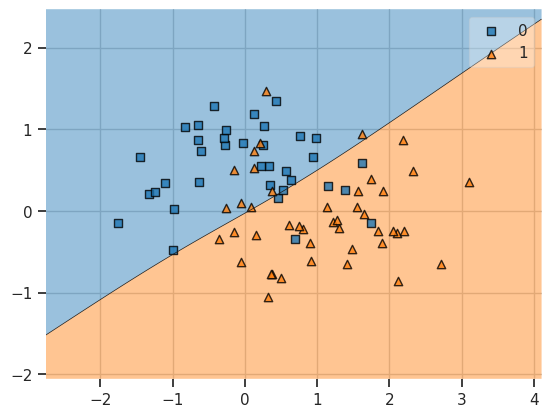

In [12]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train, clf=model)

# He's Normal (For ReLU)

In [13]:
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.get_weights()

[array([[-0.32018673, -0.5575497 ,  0.23980767,  0.46240658,  0.33961982,
         -0.43914184,  0.17917436, -0.41564664, -0.6823244 ,  0.06234634],
        [-0.4912999 , -0.32252437,  0.43303007,  0.6331176 , -0.5615555 ,
         -0.29616085, -0.03831351,  0.6936889 , -0.37783924,  0.16502547]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.3208654 ,  0.12779766,  0.36873347,  0.3596447 ,  0.2833823 ,
          0.03329557, -0.39873233, -0.11230397,  0.0313403 ,  0.41805547],
        [ 0.49179828,  0.38834018,  0.23786414, -0.41538066, -0.1349448 ,
         -0.12956578, -0.3890472 , -0.02570152, -0.52559316, -0.02874905],
        [ 0.03794515, -0.49430117,  0.42103142,  0.08245015,  0.3668424 ,
         -0.12947491,  0.30498743, -0.08349395, -0.40174186,  0.21656418],
        [ 0.43329227,  0.4178251 , -0.1013605 ,  0.25566226, -0.27501163,
          0.39640045,  0.49724424, -0.28498378,  0.48214078, -0.02045268],
        [-0.23081

In [15]:
initialized_weights= model.get_weights()

In [16]:
initialized_weights[0] = np.random.randn(2,10)*np.sqrt(2/2)
initialized_weights[1] = np.zeros(model.get_weights()[1].shape)
initialized_weights[2] = np.random.randn(10,10)*np.sqrt(2/10)
initialized_weights[3] = np.zeros(model.get_weights()[3].shape)
initialized_weights[4] = np.random.randn(10,10)*np.sqrt(2/10)
initialized_weights[5] = np.zeros(model.get_weights()[5].shape)
initialized_weights[6] = np.random.randn(10,1)*np.sqrt(2/10)
initialized_weights[7] = np.zeros(model.get_weights()[7].shape)

In [17]:
model.set_weights(initialized_weights)

In [18]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 100,validation_split = 0.2)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 289ms/step - accuracy: 0.6250 - loss: 0.6165 - val_accuracy: 0.6250 - val_loss: 0.6373
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6250 - loss: 0.6114 - val_accuracy: 0.6250 - val_loss: 0.6359
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6458 - loss: 0.5947 - val_accuracy: 0.6250 - val_loss: 0.6346
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6562 - loss: 0.5964 - val_accuracy: 0.6250 - val_loss: 0.6334
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6875 - loss: 0.5881 - val_accuracy: 0.6250 - val_loss: 0.6322
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6562 - loss: 0.5986 - val_accuracy: 0.6250 - val_loss: 0.6311
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6562 - loss: 0.5974 - val_accuracy: 0.6250 - val_loss: 0.6300
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6667 - loss: 0.5915 - val_accuracy: 0.6250 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

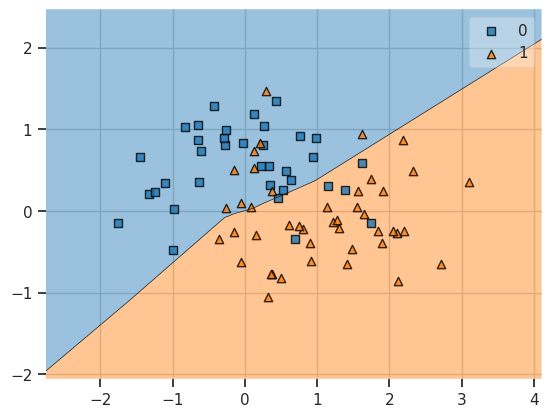

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train, clf=model)

# Based on Uniform Distribution

#1. Xavior / Glorot  Uniform
### Description : [-limit, limit] where limit = sqrt(6/(fan_in-fan_out))

#2. He's Uniform
### Description : weights belong to [-limit, limit] where limit = sqrt(6/(fan_in))